# Business Case - 4Intelligence

## Descriptive Analysis

In [1]:
# installing libs and packages

!pip install plotly -q
!pip install statsmodels -q

You should consider upgrading via the 'c:\users\gabriel\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\gabriel\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# importing libs

import pandas as pd
import numpy as np
from numpy import mean, median
from datetime import datetime , date
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load dataset

data_path = 'E:\\Projects\\4intelligence_case\\data\\Bases_Final_ADS_Jun2021.xlsx'

df = pd.read_excel(data_path, sheet_name='dados')
# columns description
col = pd.read_excel(data_path, sheet_name='dicionário')

In [4]:
# change datetime to date
df['data_tidy'] = df['data_tidy'].apply(lambda x: x.date())
# filter date
df = df.loc[df['data_tidy'] <= date(2021,2,1)]

In [5]:
col.head(3)

,coluna,descrição
0,data_tidy,data dd-MM-AAA
1,com_co,Consumo de energia (Gwh) - Comércio - Região C...
2,com_n,Consumo de energia (Gwh) - Comércio - Região N...


In [6]:
df.head(3)

,data_tidy,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,...,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
0,2004-01-01,307.28207,193.80956,589.29026,704.00174,2450.45329,364.32699,840.29035,2015.78331,1810.98019,...,49.488,28.320430,19.165591,54.848,78.497,50.75555,27.618279,20.365591,47.369,75.454326
1,2004-02-01,290.14685,175.49530,550.77261,733.89486,2396.96520,372.65151,810.25628,1942.01969,1931.86643,...,46.932,28.213793,18.634483,51.696,80.047,48.10825,28.047126,20.089655,45.738,72.953183
2,2004-03-01,307.10015,182.75690,573.02799,738.45706,2402.52074,408.63062,880.88796,2082.25048,2149.03063,...,54.556,27.595699,17.848387,57.356,95.784,54.13485,28.181720,19.749463,49.252,83.942665


In [7]:
# dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   data_tidy    206 non-null    object 
 1   com_co       206 non-null    float64
 2   com_n        206 non-null    float64
 3   com_ne       206 non-null    float64
 4   com_s        206 non-null    float64
 5   com_se       206 non-null    float64
 6   ind_co       206 non-null    float64
 7   ind_n        206 non-null    float64
 8   ind_ne       206 non-null    float64
 9   ind_s        206 non-null    float64
 10  ind_se       206 non-null    float64
 11  res_co       206 non-null    float64
 12  res_n        206 non-null    float64
 13  res_ne       206 non-null    float64
 14  res_s        206 non-null    float64
 15  res_se       206 non-null    float64
 16  renda_r      108 non-null    float64
 17  pop_ocup_br  206 non-null    float64
 18  massa_r      108 non-null    float64
 19  du      

In [8]:
# missing values
df.isnull().sum()

data_tidy       0
com_co          0
com_n           0
com_ne          0
com_s           0
com_se          0
ind_co          0
ind_n           0
ind_ne          0
ind_s           0
ind_se          0
res_co          0
res_n           0
res_ne          0
res_s           0
res_se          0
renda_r        98
pop_ocup_br     0
massa_r        98
du              0
pmc_a_co        0
temp_max_co     0
temp_min_co     0
pmc_r_co        0
pim_co          0
pmc_a_n         0
temp_max_n      0
temp_min_n      0
pmc_r_n         0
pim_n           0
pmc_a_ne        0
temp_max_ne     0
temp_min_ne     0
pmc_r_ne        0
pim_ne          0
pmc_a_s         0
temp_max_s      0
temp_min_s      0
pmc_r_s         0
pim_s           0
pmc_a_se        0
temp_max_se     0
temp_min_se     0
pmc_r_se        0
pim_se          0
dtype: int64

In [9]:
# replace nan values to zero
df = df.fillna(0)

In [10]:
df.describe()

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,...,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,...,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,499.413058,327.077018,949.482511,1058.505600,3399.487372,645.965645,1121.508683,2164.581106,2495.467859,7828.909078,...,82.358416,25.050710,16.039367,85.787085,95.417141,84.184891,27.560470,19.019776,82.852556,91.293978
std,117.082197,85.115276,230.050914,229.854143,622.482273,146.821214,122.253021,258.964022,260.203685,519.733801,...,18.637892,3.399066,3.335071,18.998937,9.400163,17.658191,2.029535,2.067717,19.240877,10.277537
min,283.104360,175.495300,539.451790,627.651660,2159.479470,364.326990,810.256280,1452.131560,1810.980190,6331.118910,...,46.932000,17.711111,8.993333,51.696000,64.969000,46.530450,22.314066,14.887778,45.084000,60.322438
25%,393.400500,241.178000,731.956970,850.131000,2848.940582,497.029030,1028.227250,1914.298240,2278.951250,7477.524742,...,68.462000,22.099044,13.021685,69.846000,90.361000,71.544906,25.865179,17.276179,68.695250,84.491268
50%,520.498000,340.640810,972.266000,1090.080000,3488.666500,693.921500,1140.072275,2215.213160,2557.742935,7783.614835,...,85.298000,25.280950,16.369231,88.726000,95.262500,87.861800,27.562541,19.396541,88.724000,91.208844
75%,602.572903,404.041558,1169.773077,1217.270647,3914.279410,769.517565,1228.590750,2394.268000,2693.228027,8272.468750,...,96.911000,28.061966,19.089785,97.657000,102.957750,96.132606,29.082607,20.853889,94.354750,97.986929
max,683.111370,460.262000,1390.622270,1552.666000,4571.717000,904.781750,1321.958000,2574.711000,3037.010600,8795.554000,...,132.299461,31.734409,22.198925,146.804402,116.958000,126.255031,32.022581,23.132233,137.334905,112.047328


In [11]:
print('Observations: ',df.shape[0])
print('Features: ',df.shape[1])

Observations:  206
Features:  45


In [12]:
print('Inicio:',df['data_tidy'].min())
print('Final:',df['data_tidy'].max())

Inicio: 2004-01-01
Final: 2021-02-01


## Feature Engineering

In [13]:
# creating year, month features

df['ano'] = df['data_tidy'].apply(lambda x: x.year)
df['mes'] = df['data_tidy'].apply(lambda x: x.month)

In [14]:
# creating new features

# total energy consumed by business category
df['com_total'] = df['com_co'] + df['com_n'] + df['com_ne'] + df['com_s'] + df['com_se']

# total energy consumed by industrial category
df['ind_total'] = df['ind_co'] + df['ind_n'] + df['ind_ne'] + df['ind_s'] + df['ind_se']

# total energy consumed by residential category
df['res_total'] = df['res_co'] + df['res_n'] + df['res_ne'] + df['res_s'] + df['res_se']

# total energy consumed
df['total'] = df['res_total'] + df['ind_total'] + df['com_total']

In [15]:
# creating new features about each region
# consumption total by region

# SE
df['se_total'] = df['com_se'] + df['ind_se'] + df['com_se']
# S
df['s_total'] = df['com_s'] + df['ind_s'] + df['com_s']
# NE
df['ne_total'] = df['com_ne'] + df['ind_ne'] + df['com_ne']
# N
df['n_total'] = df['com_n'] + df['ind_n'] + df['com_n']
# CO
df['co_total'] = df['com_co'] + df['ind_co'] + df['com_co']

In [16]:
# new features about temperature

# max tempearature in Brazil
df['max_temp'] = df[['temp_max_n','temp_max_ne','temp_max_co','temp_max_se','temp_max_s']].max(axis =1)
# min tempearature in Brazil
df['min_temp'] = df[['temp_max_n','temp_max_ne','temp_max_co','temp_max_se','temp_max_s']].min(axis =1)
# delta - the difference
df['delta'] = df['max_temp'] - df['min_temp']
# the mean -min-max
df['media_temp'] = (df['max_temp'] + df['min_temp'])/2

## Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='ano', ylabel='total'>

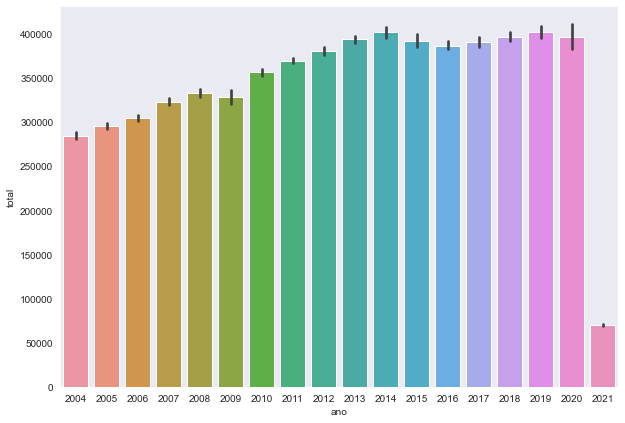

In [17]:
# energy consumption by year

sns.set_style("dark")
rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='ano', y='total' , estimator=sum)

<AxesSubplot:xlabel='mes', ylabel='total'>

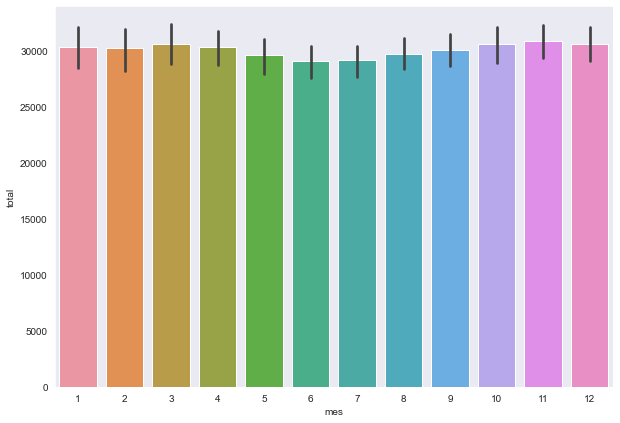

In [18]:
# energy consumption by year

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='mes', y='total' , estimator = mean)

<AxesSubplot:xlabel='ano', ylabel='res_total'>

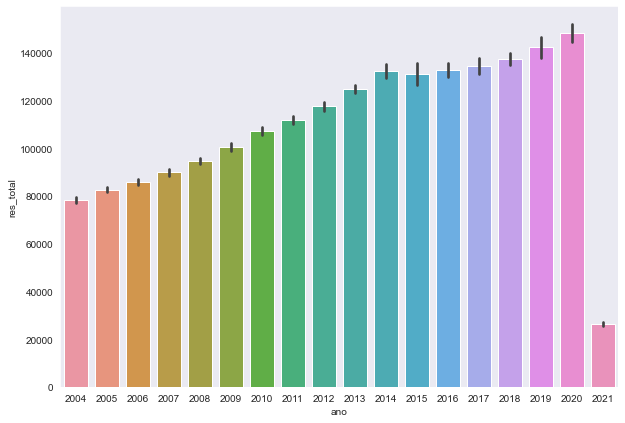

In [19]:
# total energy consumption by Residencial class

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='ano', y='res_total' , estimator=sum)

<AxesSubplot:xlabel='ano', ylabel='com_total'>

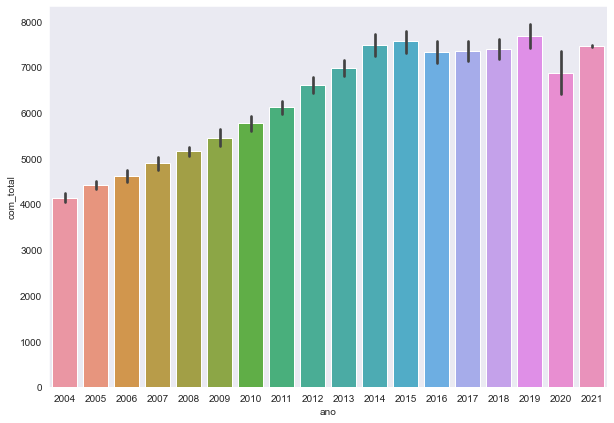

In [20]:
# Average energy consumption by Business class

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='ano', y='com_total')

<AxesSubplot:xlabel='mes', ylabel='res_total'>

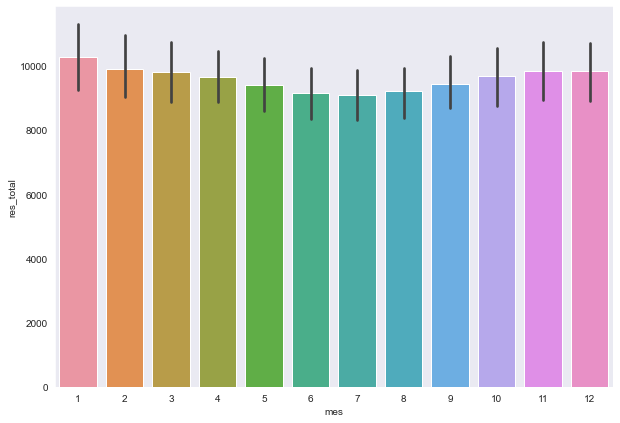

In [21]:
# Average energy consumption by Residential class monthly

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='mes', y='res_total')

<AxesSubplot:xlabel='mes', ylabel='media_temp'>

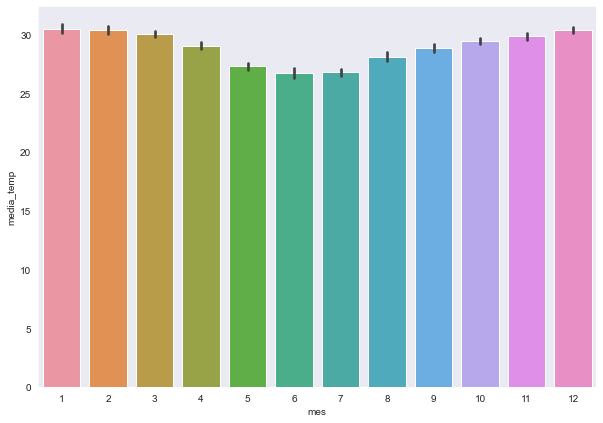

In [22]:
# average temperature by month

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='mes', y='media_temp')

<AxesSubplot:xlabel='mes', ylabel='se_total'>

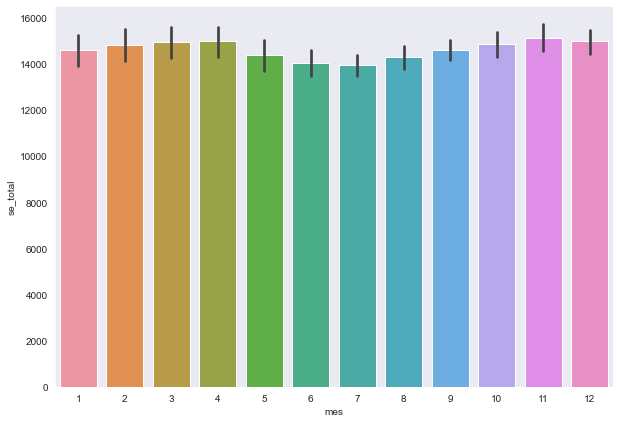

In [23]:
# southeast region eletrical energy consumption

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='mes', y='se_total' , estimator = mean)

<AxesSubplot:xlabel='mes', ylabel='s_total'>

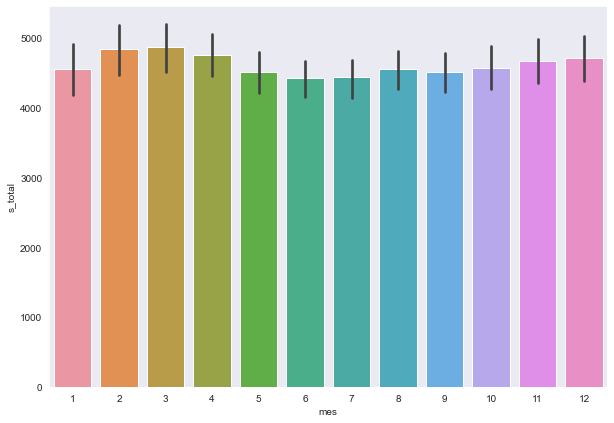

In [24]:
# mean energy consumption in south region by month (all classes)

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='mes', y='s_total' , estimator = mean)

<AxesSubplot:xlabel='mes', ylabel='co_total'>

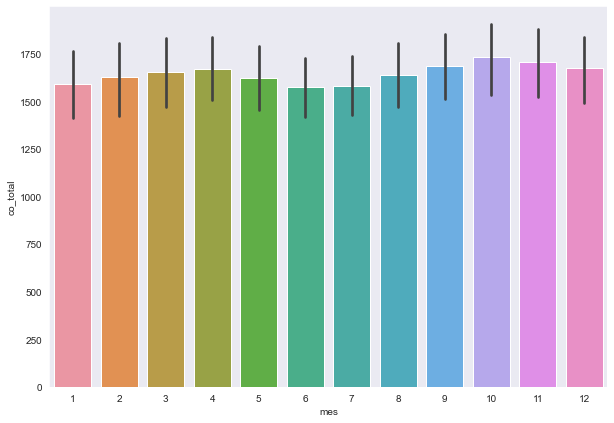

In [25]:
# mean energy consumption in CO region by month (all classes)

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='mes', y='co_total' , estimator = mean)

<AxesSubplot:xlabel='mes', ylabel='co_total'>

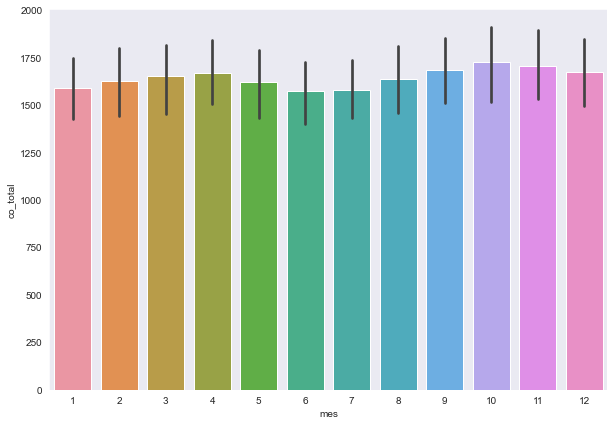

In [26]:
# ....

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='mes', y='co_total' , estimator = mean)

<AxesSubplot:xlabel='ano', ylabel='pop_ocup_br'>

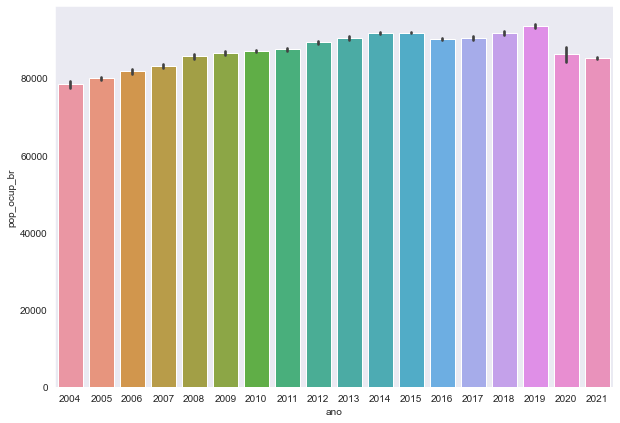

In [27]:
# ....

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='ano', y='pop_ocup_br' , estimator = mean)

<AxesSubplot:xlabel='ano', ylabel='massa_r'>

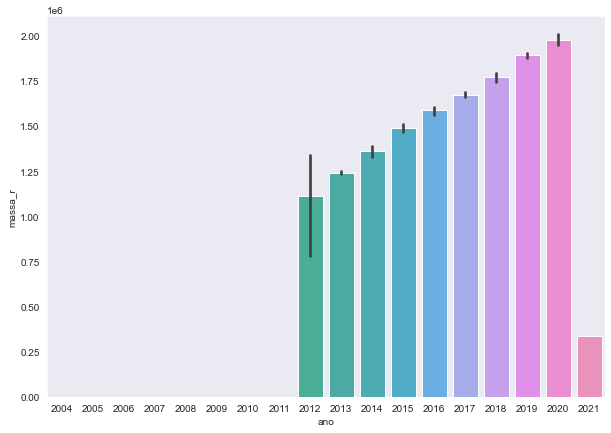

In [28]:
# ....

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='ano', y='massa_r' , estimator = sum)

<AxesSubplot:xlabel='mes', ylabel='n_total'>

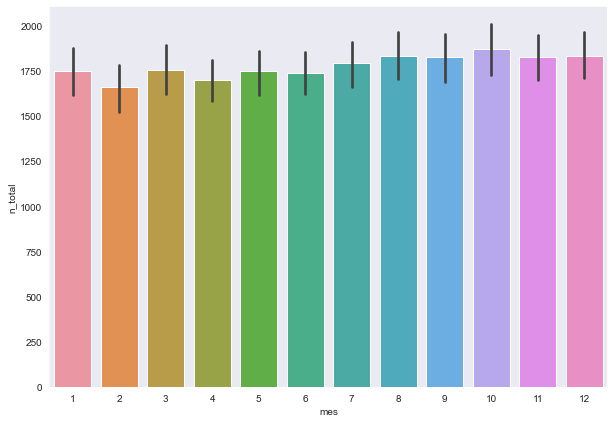

In [29]:
# ....

rcParams['figure.figsize'] = 10, 7
sns.barplot(data = df, x='mes', y='n_total' , estimator = mean)

In [30]:
# cálculos

(df.loc[(df['ano']==2019)]['com_total'].sum() - df.loc[(df['ano']==2020)]['com_total'].sum())/df.loc[(df['ano']==2019)]['com_total'].sum()

(df.loc[(df['ano']==2020)]['res_total'].sum() - df.loc[(df['ano']==2019)]['res_total'].sum())/df.loc[(df['ano']==2019)]['res_total'].sum()

(df.loc[(df['ano']==2019)]['ind_total'].sum() - df.loc[(df['ano']==2020)]['ind_total'].sum())/df.loc[(df['ano']==2020)]['ind_total'].sum()

(df.loc[(df['ano']==2019)]['total'].sum() - df.loc[(df['ano']==2020)]['total'].sum())#/df.loc[(df['ano']==2020)]['total'].sum()

5734.13637100003

Text(0.5, 1.0, 'Data Correlation')

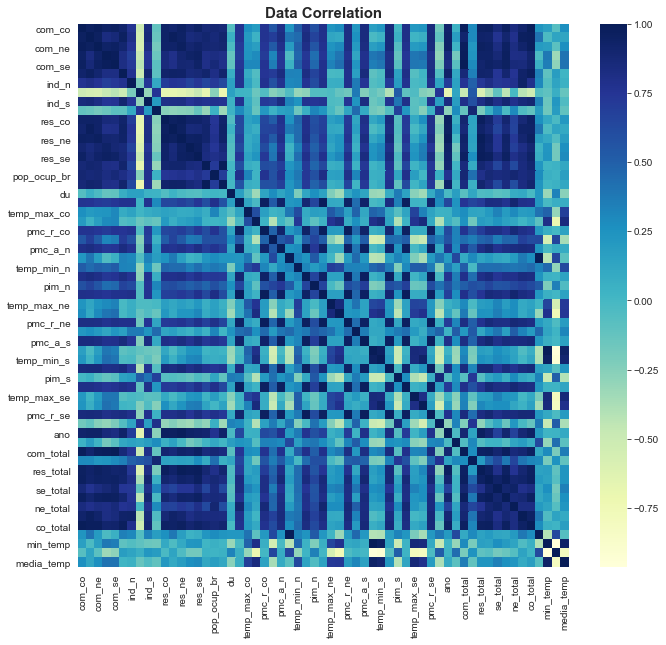

In [31]:
# correlation matrix
# pearson correlation to discover the Linear Correlation between features

rcParams['figure.figsize'] = 11, 10
mc = df.corr(method = 'pearson')
sns.heatmap(mc, cmap='YlGnBu')
plt.title('Data Correlation' , size = 15 , weight = 'bold')

Text(0.5, 1.0, 'Data Correlation')

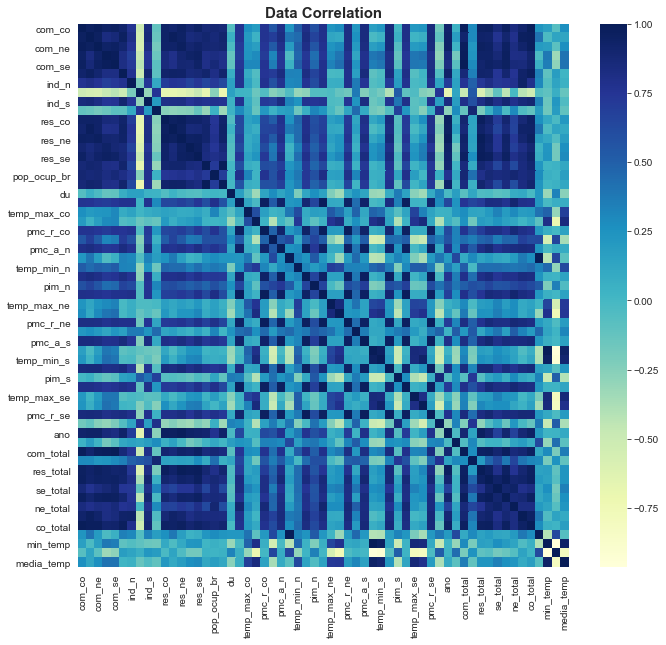

In [32]:
# correlation matrix
# spearman correlation to discover the non-parametric Correlation between features (more robust to outliers)

rcParams['figure.figsize'] = 11, 10
mc1 = df.corr(method = 'spearman')
sns.heatmap(mc, cmap='YlGnBu')
plt.title('Data Correlation' , size = 15 , weight = 'bold')

In [33]:
# plot total energy time series

fig = px.line(df, x='data_tidy', y='com_total', title='Total Energy in Business Category')
fig.show()

In [34]:
# plot total energy time series

fig = px.line(df, x='data_tidy', y='ind_total', title='Total Energy in Industry Category')
fig.show()

In [35]:
# plot total energy time series

fig = px.line(df, x='data_tidy', y='res_total', title='Total Energy in Residential Category')
fig.show()

In [36]:
# setting date in index
df_time = df.set_index('data_tidy')

In [37]:
# separated series for each feature

time_series_com = df_time['com_total']
time_series_ind = df_time['ind_total']
time_series_res = df_time['res_total']
time_series_tot = df_time['total']
time_series_com_se = df_time['com_se']
time_series_res_ne = df_time['res_ne']
time_series_ind_se = df_time['ind_se']

# setting datetime index
time_series_com.index = pd.to_datetime(time_series_com.index, errors='coerce')
time_series_ind.index = pd.to_datetime(time_series_ind.index, errors='coerce')
time_series_res.index = pd.to_datetime(time_series_res.index, errors='coerce')
time_series_tot.index = pd.to_datetime(time_series_tot.index, errors='coerce')
time_series_com_se.index = pd.to_datetime(time_series_com_se.index, errors='coerce')
time_series_res_ne.index = pd.to_datetime(time_series_res_ne.index, errors='coerce')
time_series_ind_se.index = pd.to_datetime(time_series_ind_se.index, errors='coerce')

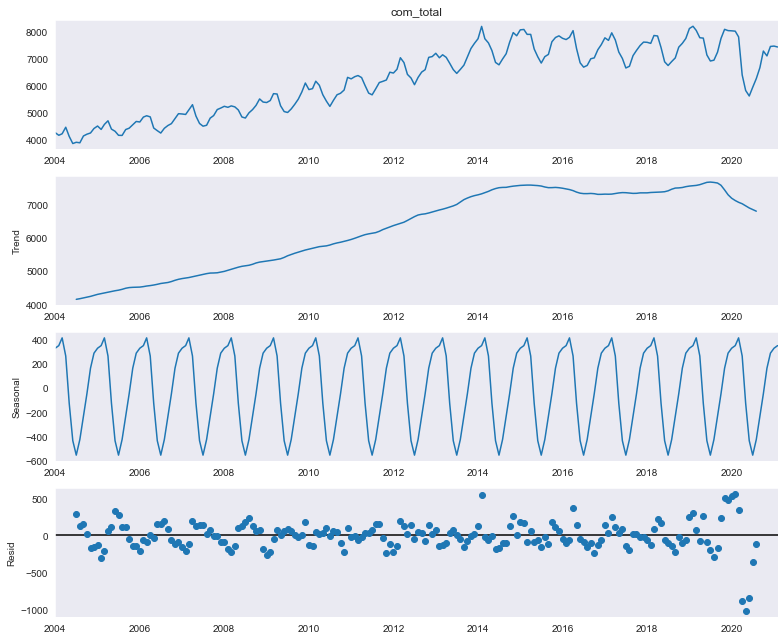

In [38]:
# decompose the energy in trend, seasonal and resids to know main trend and the frequent moviments
# statiscal analyze
# Business Total Consumption

rcParams['figure.figsize'] = 11, 9
decomposed_business_energy = sm.tsa.seasonal_decompose(time_series_com) # The frequncy is annual
figure = decomposed_business_energy.plot()
plt.show()

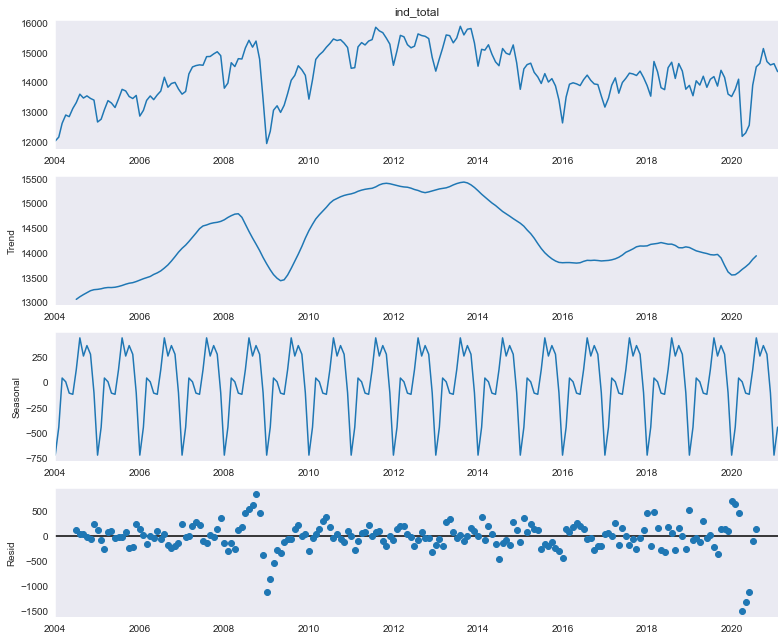

In [39]:
# decompose the energy in trend, seasonal and resids to know main trend and the frequent moviments
# statiscal analyze
# Industrial Total Consumption

rcParams['figure.figsize'] = 11, 9
decomposed_industry_energy = sm.tsa.seasonal_decompose(time_series_ind) # The frequncy is annual
figure = decomposed_industry_energy.plot()
plt.show()

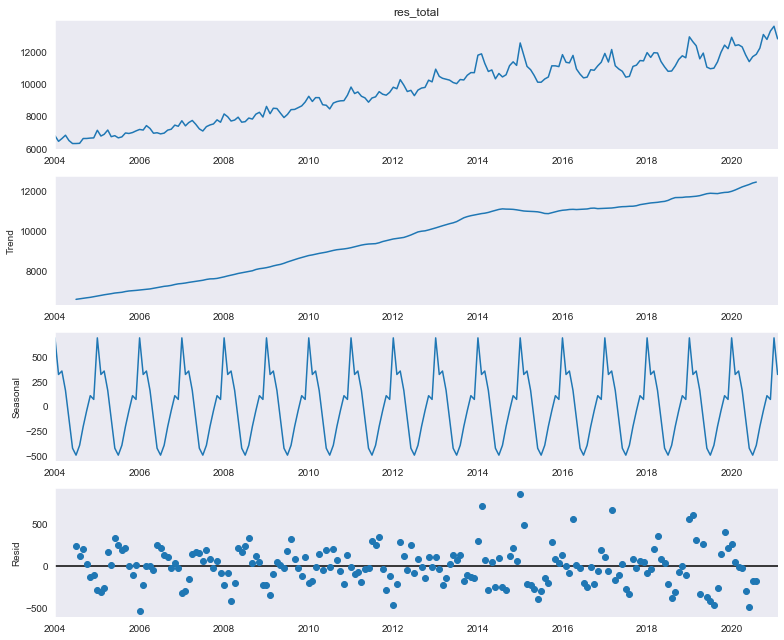

In [40]:
# decompose the energy in trend, seasonal and resids to know main trend and the frequent moviments
# statiscal analyze
# Residential Total Consumption

rcParams['figure.figsize'] = 11, 9
decomposed_residential_energy = sm.tsa.seasonal_decompose(time_series_res) # The frequncy is annual
figure = decomposed_residential_energy.plot()
plt.show()

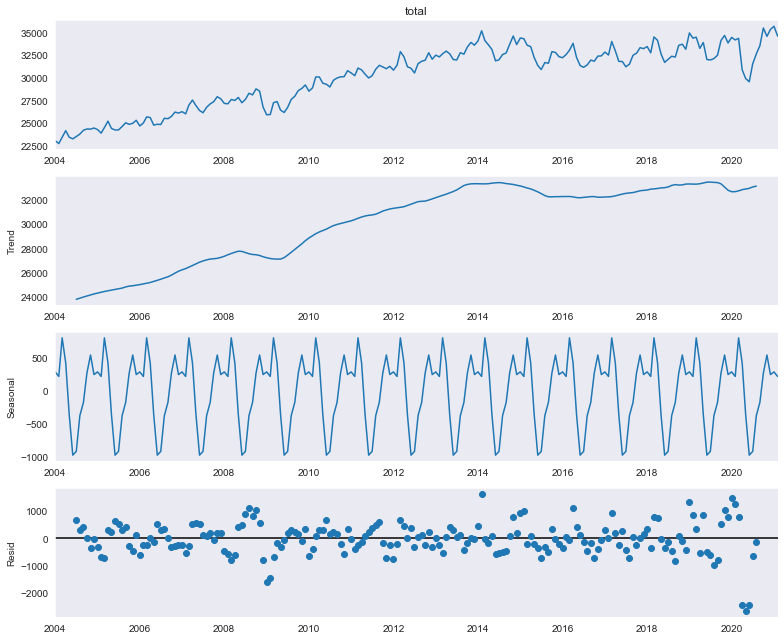

In [41]:
# decompose the energy in trend, seasonal and resids to know main trend and the frequent moviments
# statiscal analyze
# Total Consumption

rcParams['figure.figsize'] = 11, 9
decomposed_total_energy = sm.tsa.seasonal_decompose(time_series_tot) # The frequncy is annual
figure = decomposed_total_energy.plot()
plt.show()

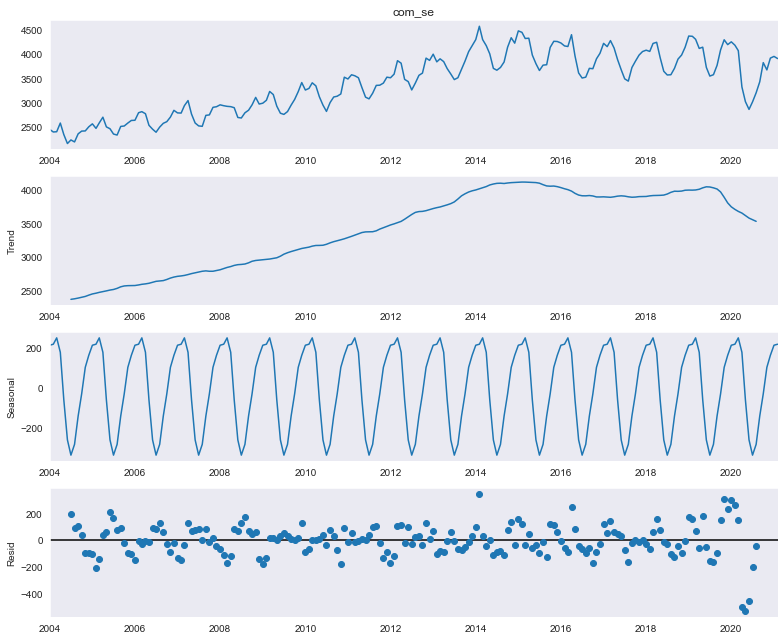

In [42]:
# decompose the energy in trend, seasonal and resids to know main trend and the frequent moviments
# statiscal analyze
# Business energy consumption in SE

rcParams['figure.figsize'] = 11, 9
decomposed_comse_energy = sm.tsa.seasonal_decompose(time_series_com_se) # The frequncy is annual
figure = decomposed_comse_energy.plot()
plt.show()

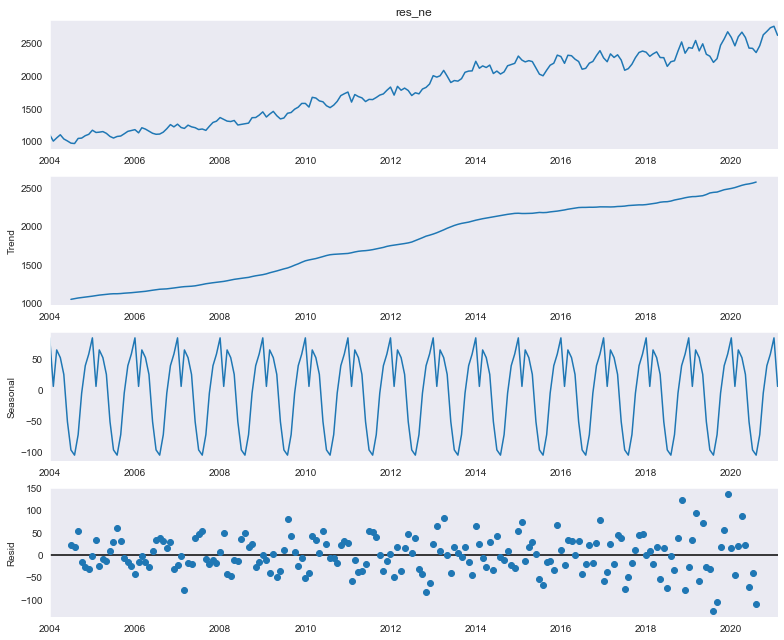

In [43]:
# decompose the energy in trend, seasonal and resids to know main trend and the frequent moviments
# statiscal analyze
# Residential energy consumption in NE

rcParams['figure.figsize'] = 11, 9
decomposed_resne_energy = sm.tsa.seasonal_decompose(time_series_res_ne) # The frequncy is annual
figure = decomposed_resne_energy.plot()
plt.show()

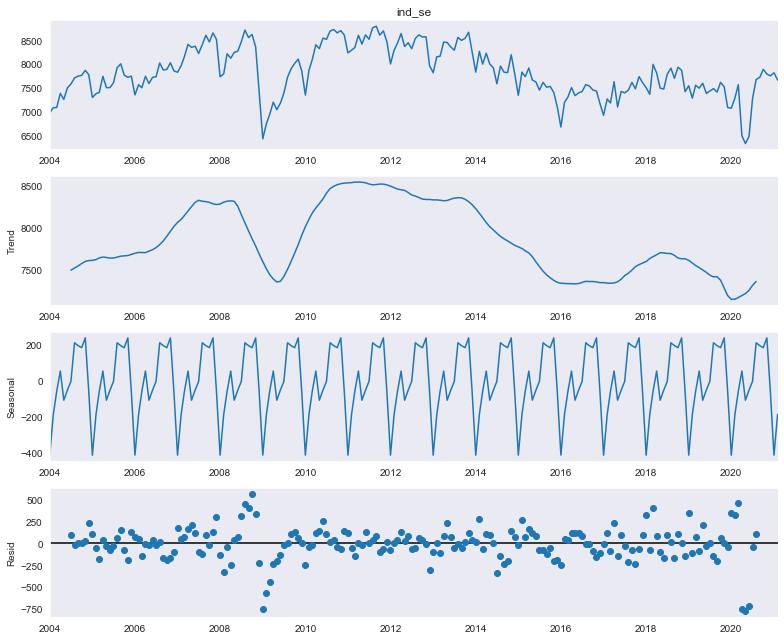

In [44]:
# decompose the energy in trend, seasonal and resids to know main trend and the frequent moviments
# statiscal analyze
# Industrial energy consumption in SE

rcParams['figure.figsize'] = 11, 9
decomposed_indse_energy = sm.tsa.seasonal_decompose(time_series_ind_se) # The frequncy is annual
figure = decomposed_indse_energy.plot()
plt.show()

In [45]:
# strongests correlations between business energy consumption
mc1['com_total'].sort_values(ascending=False)

com_total      1.000000
com_se         0.993232
com_s          0.981375
com_co         0.972262
com_ne         0.965445
s_total        0.962424
total          0.959330
res_se         0.949070
res_total      0.937263
co_total       0.933081
res_s          0.916478
res_ne         0.911481
res_co         0.909748
se_total       0.889576
ano            0.871164
pop_ocup_br    0.864866
com_n          0.864540
pmc_r_s        0.841772
n_total        0.839106
res_n          0.837540
ne_total       0.830293
pmc_r_se       0.811904
massa_r        0.793056
ind_co         0.790559
pmc_r_ne       0.784577
pmc_a_s        0.781223
renda_r        0.775697
ind_s          0.774512
pmc_r_n        0.769414
pmc_a_n        0.743343
pmc_a_ne       0.734863
pmc_a_se       0.722051
pmc_r_co       0.715932
ind_n          0.710570
pmc_a_co       0.686229
temp_min_n     0.518942
pim_n          0.474697
pim_co         0.413998
temp_min_ne    0.395151
media_temp     0.394123
temp_min_se    0.374192
temp_min_s     0

In [46]:
# strongests correlations between business energy consumption
mc1['ind_total'].sort_values(ascending=False)

ind_total      1.000000
ind_se         0.866199
pim_se         0.749322
pim_s          0.715425
pmc_a_co       0.663270
pmc_a_se       0.596793
ind_ne         0.587675
pmc_a_ne       0.585891
pmc_r_co       0.581165
pim_n          0.580810
ne_total       0.576083
se_total       0.552050
ind_s          0.521705
pmc_a_n        0.514569
pmc_r_ne       0.490818
pmc_a_s        0.480180
pim_ne         0.477435
pim_co         0.456693
ind_n          0.443632
pmc_r_n        0.430511
pmc_r_se       0.421869
total          0.383957
ind_co         0.334195
n_total        0.332797
s_total        0.332563
pop_ocup_br    0.318353
pmc_r_s        0.304255
max_temp       0.296546
temp_max_n     0.294912
co_total       0.279430
mes            0.275173
com_n          0.260479
delta          0.257826
com_se         0.252683
com_co         0.238231
com_total      0.226417
res_se         0.222354
com_s          0.220315
res_n          0.195901
com_ne         0.181605
res_co         0.180533
res_total      0

In [47]:
# strongests correlations between business energy consumption
mc1['res_total'].sort_values(ascending=False)

res_total      1.000000
res_ne         0.985008
res_se         0.982791
res_co         0.981079
res_s          0.979549
ano            0.966379
com_ne         0.944202
total          0.942315
com_co         0.941770
co_total       0.940456
com_total      0.937263
s_total        0.933002
com_s          0.925383
res_n          0.921858
com_se         0.906261
massa_r        0.896637
com_n          0.894030
renda_r        0.881795
pmc_r_s        0.880817
ind_co         0.872950
n_total        0.851977
pmc_r_se       0.808748
pmc_a_s        0.804557
ind_s          0.797905
pmc_r_n        0.782483
pop_ocup_br    0.768988
pmc_a_n        0.765439
se_total       0.764761
pmc_r_ne       0.740162
ne_total       0.710105
pmc_a_se       0.705959
ind_n          0.705136
pmc_a_ne       0.690576
pmc_r_co       0.654431
pmc_a_co       0.644474
pim_n          0.544636
pim_co         0.472955
temp_min_n     0.444060
temp_min_se    0.334369
temp_min_ne    0.277086
temp_min_s     0.274158
media_temp     0

In [48]:
# strongests correlations between business energy consumption
mc1['total'].sort_values(ascending=False)

total          1.000000
s_total        0.977118
res_se         0.961511
com_total      0.959330
com_co         0.951421
com_se         0.948223
co_total       0.946580
com_s          0.945451
res_total      0.942315
com_ne         0.927054
res_s          0.921959
res_co         0.920901
se_total       0.911229
res_ne         0.910264
pmc_r_s        0.879195
ano            0.878445
com_n          0.868819
ind_s          0.866409
pmc_r_se       0.856296
ind_co         0.855250
pmc_a_s        0.853600
ne_total       0.852431
n_total        0.850658
res_n          0.846592
pmc_r_n        0.823384
pmc_a_n        0.820860
pmc_r_ne       0.820287
pop_ocup_br    0.819049
massa_r        0.801244
pmc_a_se       0.797483
pmc_a_ne       0.789421
renda_r        0.788773
pmc_r_co       0.756597
pmc_a_co       0.755053
ind_n          0.732029
pim_n          0.597355
pim_co         0.469354
temp_min_n     0.450777
ind_total      0.383957
temp_min_se    0.309295
media_temp     0.300330
temp_min_ne    0

Text(0.5, 1.0, 'Correlation: Total x Res_se')

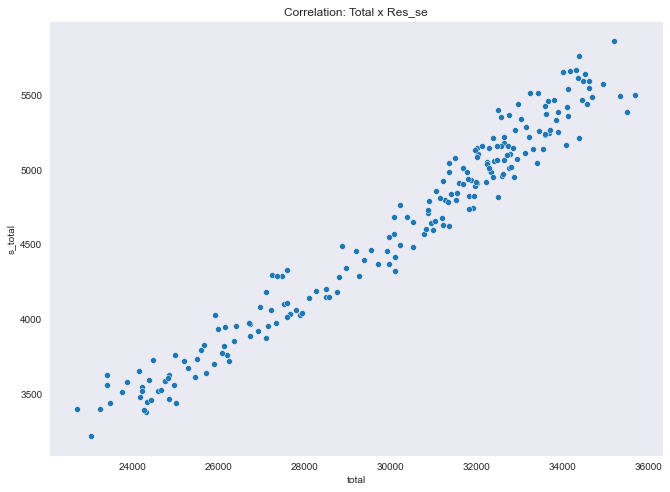

In [49]:
# plot correlation between two variables: total and s_total

rcParams['figure.figsize'] = 11, 8
sns.scatterplot(data = df , x = 'total', y='s_total').set_title('Correlation: Total x Res_se')

Text(0.5, 1.0, 'Correlation: Residential Total x Residential NE')

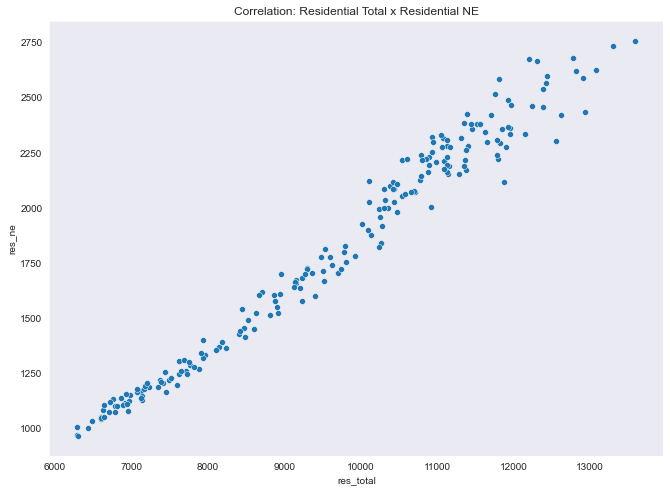

In [50]:
# plot correlation between two variables: res_total and res_ne

rcParams['figure.figsize'] = 11, 8
sns.scatterplot(data = df , x = 'res_total', y='res_ne').set_title('Correlation: Residential Total x Residential NE')

Text(0.5, 1.0, 'Correlation: Industry Total x Industry SE')

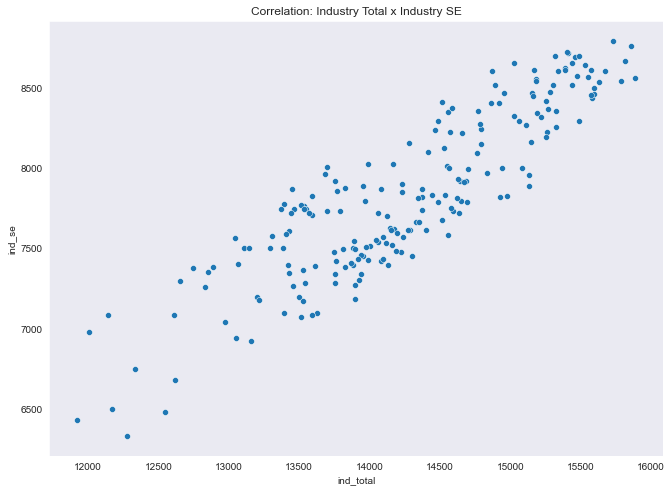

In [51]:
# plot correlation between two variables: ind_total and ind_se

rcParams['figure.figsize'] = 11, 8
sns.scatterplot(data = df , x = 'ind_total', y='ind_se').set_title('Correlation: Industry Total x Industry SE')

Text(0.5, 1.0, 'Correlation: Business Total x Business SE')

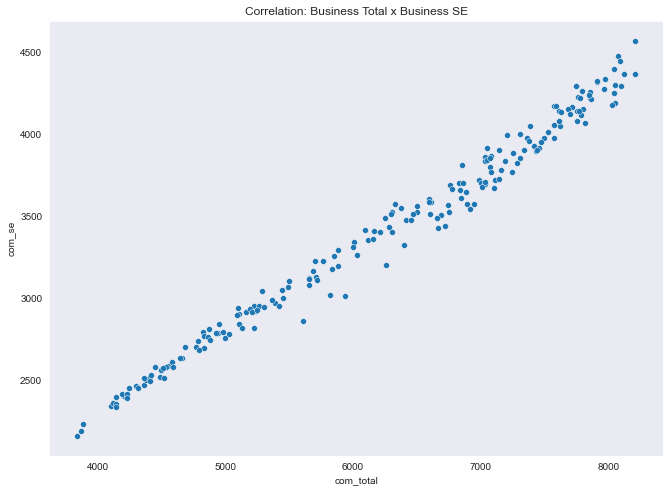

In [52]:
# plot correlation between two variables: com_total and com_se

rcParams['figure.figsize'] = 11, 8
sns.scatterplot(data = df , x = 'com_total', y='com_se').set_title('Correlation: Business Total x Business SE')

# Insight Time ...

![Alt Text](https://media.giphy.com/media/3oKIPdiPGxPI7Dze7u/giphy.gif)

## Versão em Português:
#### 1. A partir dos gráficos de barras mostrados, nos meses mais quentes(em média) há um aumento no consumo de energia residencial.

#### 2. Em 2020, houve uma redução do consumo de energia elétrica total (3 classes) em relação a 2019, fato que não ocorria desde 2016. Redução essa de 1,5% que se traduz em 5734 GWh.

#### 3. Houve uma queda de 10,5% da energia elétrica consumida pelo comércio em 2020 em relação a 2019.

#### 4. A _feature_ com maior correlação da energia elétrica total consumida ('total') é a energia total consumida na regição sul ('s_total').

#### 5. A _feature_ mais representativa da energia elétrica Residencial total consumida ('res_total') é a energia elétrica Residencial total consumida na região nordeste ('res_ne').

#### 6. A _feature_ mais representativa da energia elétrica Industrial total consumida ('ind_total') é a energia elétrica Industrial total consumida na região sudeste ('ind_se').

#### 7. A _feature_ de maior correlação da energia elétrica Comercial total consumida ('com_total') é a energia elétrica Industrial total consumida na região sudeste ('com_se').

#### 8. Na decomposição estatística da energia elétrica residencial comsumida a tendência principal sempre cresceu. Além disso, há uma sazionalidade bem definida ao longo dos meses.

#### 9. Na decomposição estatística da energia elétrica industrial comsumida a tendência principal não existe um padrão. Mas, há uma sazionalidade bem definida ao longo dos meses.

#### 10. A decomposição estatística da energia consumida pelo setor do Comércio na região sudeste é bastante semelhante a decomposição da energia consumida total Comercial. Esse fato reforça a representatividade já mencionada de correlação dessas duas variáveis.